In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("./data/2022_election_cycle_fundraising.csv")

In [4]:
columns = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
df = df[columns]

In [5]:
# Tp handle: Convert dollar values to numeric (remove commas, dollar signs, and convert to float)
for col in columns:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

In [6]:
# Min-max normalization
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=columns)

In [7]:
# Determine the optimal number of clusters using a scree plot
inertia = []
K_range = range(1, 11)  # Trying k from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

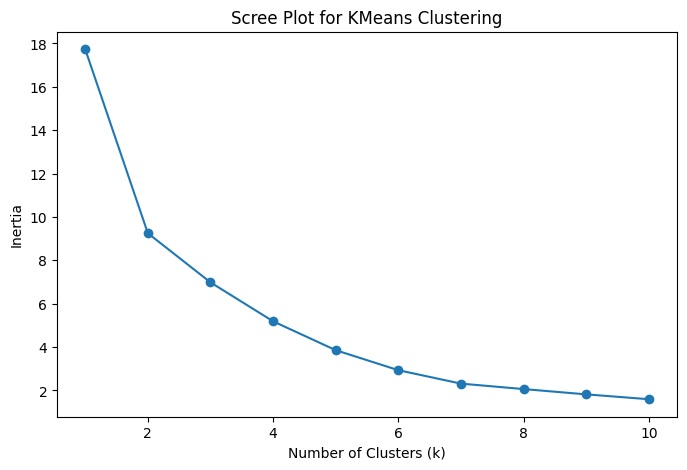

In [8]:
# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Scree Plot for KMeans Clustering')
plt.show()

In [13]:
optimal_k = 4  # based on scree plot elbow

# KMeans clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_normalized['Cluster'] = kmeans.fit_predict(df_normalized)

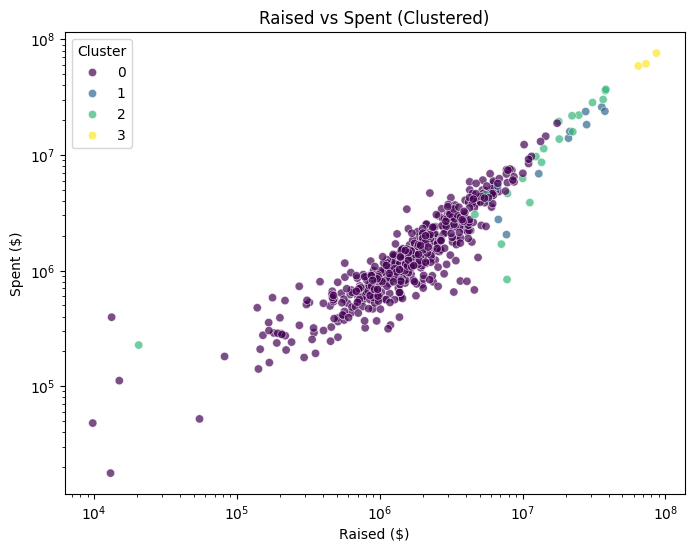

In [14]:
# Scatter plot: Raised vs Spent with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Raised'], y=df['Spent'], hue=df_normalized['Cluster'], palette='viridis', alpha=0.7)
plt.xscale("log")  # Log scale to better visualize spread
plt.yscale("log")
plt.xlabel('Raised ($)')
plt.ylabel('Spent ($)')
plt.title('Raised vs Spent (Clustered)')
plt.legend(title='Cluster')
plt.show()

In [15]:
# Identify smallest clusters
smallest_clusters = df_normalized['Cluster'].value_counts().nsmallest(2).index
smallest_politicians = df[df_normalized['Cluster'].isin(smallest_clusters)]
print("Politicians in the smallest two clusters:")
print(smallest_politicians)

Politicians in the smallest two clusters:
         Raised       Spent  Cash on Hand       Debts
2    20993041.0  13957854.0    20942888.0         0.0
89   35899966.0  25944350.0    20231213.0         0.0
133  12990741.0   6878050.0     6206371.0  13302000.0
261  28119082.0  18276565.0    15530074.0         0.0
267   6770674.0   2763217.0    17419927.0         0.0
274   7720264.0   2045198.0    14024163.0         0.0
290  21441693.0  15946876.0    15762568.0         0.0
310   6695582.0   5371524.0    13815515.0         0.0
340  73140886.0  61357281.0    13186127.0         0.0
417  86581469.0  75959810.0    22762985.0         0.0
442  27680901.0  23731653.0     4508581.0  11759857.0
500  37743256.0  23876921.0    21539824.0         0.0
523  64682883.0  58806664.0     6647641.0         0.0


It appears a lot of politicians who raised and spent A LOT of money appear in these two clusters, along with politicians who raised a moderate amount of money, but have even more debt than funds.

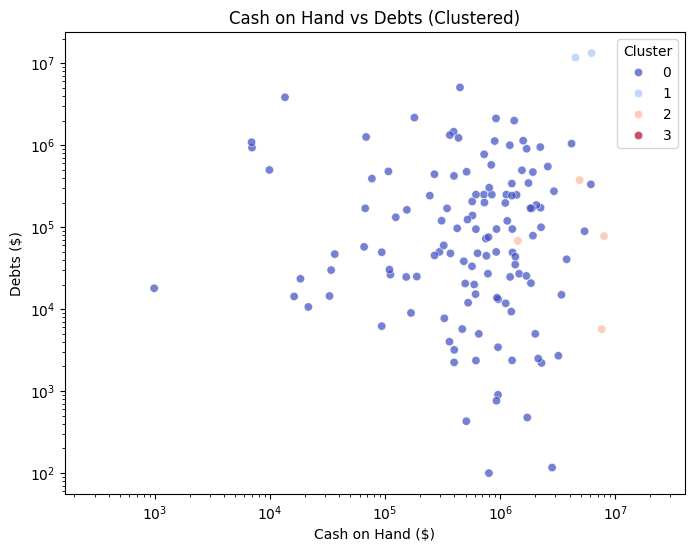

In [ ]:
# Repeat for Cash on Hand vs Debts
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Cash on Hand'], y=df['Debts'], hue=df_normalized['Cluster'], palette='coolwarm', alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Cash on Hand ($)')
plt.ylabel('Debts ($)')
plt.title('Cash on Hand vs Debts (Clustered)')
plt.legend(title='Cluster')
plt.show()

In this graph, the two smallest clusters appear to be that of the politicians who have lots of money on hand, but an equal amount of debt along with the politicians who have a moderate amount of debt but even more cash on hand. 

In [17]:
# KMeans with all four numeric variables
kmeans_all = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_normalized['Cluster_All'] = kmeans_all.fit_predict(df_normalized[columns])

# Compare results
print("Comparison of clustering with all variables:")
print(df_normalized.groupby('Cluster_All').mean())

Comparison of clustering with all variables:
               Raised     Spent  Cash on Hand     Debts   Cluster
Cluster_All                                                      
0            0.041524  0.024038      0.055899  0.006370  0.000000
1            0.215170  0.175817      0.440987  0.001319  1.733333
2            0.246933  0.201486      0.237529  0.942033  1.000000
3            0.866091  0.860647      0.624840  0.000000  3.000000


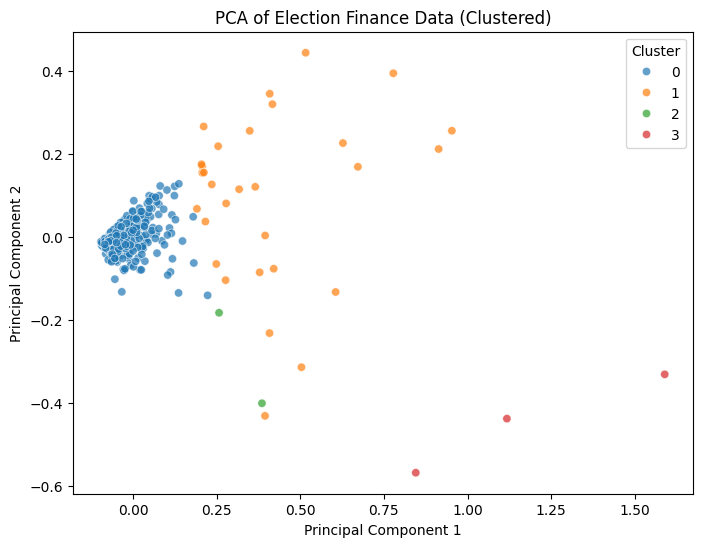

In [18]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_normalized[columns]), columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_normalized['Cluster_All']

# Scatter plot with PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='tab10', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Election Finance Data (Clustered)')
plt.legend(title='Cluster')
plt.show()

In the graph above, it becomes very clear that there are definitely a few distinct groups in the data like was found in the graphs before. Some high spenders and receivers, some with large debts, but most in a median "no debt, some cash, no large spending" area. 

If the clusters align with political party, competitiveness, or fundraising strategies, then the method is useful - especially so if the clusters can predict a campaign win or loss. The clustering did find some very interesting patterns, specifically regarding debt vs. money on hand and total spent vs fundraised. Combined with information about wins, losses, campaign troubles, and other data- this could potentially be very useful in coming up with a successful monetary and fundraising plan for a future campaign.  